# Rede Neural para Classificação de Documentos da Coleção REUTERS
Por José Geraldo Dantas Nunes

<h3>Problema: </h3>

Classificar notícias e categorias do conjunto de dados Reuters

 Bibliotecas para desenvolvimento da Rede Neural

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import reuters
from keras import models
from keras import layers

Inicialização do conjunto de dados para treinamento e teste da rede neural.

In [2]:
# Quantidade de dados da coleção para realizar as etapas de treinamento e teste
qtde = 20000

# Divisão de dados entre treinamento e teste para validar o desempenho da Rede Neural

# Dados de treinamento             Dados de teste                    Origem dos dados
(dados_treino , classes_treino) , (dados_teste , classes_teste) = reuters.load_data(num_words = qtde)

print(reuters.get_word_index())

{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803, 'hanging': 13796, 'localized': 20672, 'sation': 20673, 'chanthaburi': 20675, 'refunding': 10997, 'hermann': 8804, 'passsengers': 20676, 'stipulate': 20677, 'heublein': 8352, 'screaming': 20713, 'tcby': 16261, 'four': 185, 'grains': 1642, 'broiler': 20680, 'wooden': 12090, 'wednesday': 1220, 'highveld': 13797, 'duffour': 7593, '0053': 20681, 'elections': 3914, '270': 2563, '271': 3551, '272': 5113, '273': 3552, '274': 3400, 'rudman': 7975, '276': 3401, '277': 3478, '278': 3632, '279': 4309, 'dormancy': 9381, 'errors': 7247, 'deferred': 3086, 'sptnd': 20683, 'cooking': 8805, 'stratabit': 20684, 'designing': 16262, 'metalurgicos': 20685, 'databank': 13798, '300er': 20686, 'shocks': 20687, 'nawg': 7972, 'tnta': 20688, 'perforations': 20689, 'affiliates': 2891, '27p': 20690, 'ching': 16263, 'china': 595, 'wagyu': 16264, 'affiliated': 3189, 'chino': 16265, 'chinh': 16266, 'slickline': 20692, 'doldrums': 13799, 'kids': 12092, 'cl

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


<h3> Arquivos para Treinamento </h3>

In [3]:
indice_palavras = reuters.get_word_index()
indice_reverso_palavras = dict([(value, key) for (key, value) in indice_palavras.items()])
noticias = ' '.join([indice_reverso_palavras.get(i - 3, '?') for i in dados_treino[0]])

<h3> Pré Processamento dos dados de entrada para o modelo de classificação</h3>

In [4]:
# Função para transformar as palavras em vetor 

def vetoriza(sequencia, dimensao = qtde):
    resultado = np.zeros((len(sequencia), dimensao))
    for i, seq in enumerate(sequencia):
        resultado[i, seq] = 1.
    return resultado

In [5]:
# Função para codificar as palavras em números

def one_hot_encode(classes, dimensao = 46):
    resultado = np.zeros((len(classes), dimensao))
    for i, classe in enumerate(classes):
        resultado[i, classe] = 1.
    return resultado

In [6]:
# vetoriza os dados de entrada
x_treino = vetoriza(dados_treino)
x_teste = vetoriza(dados_teste)

#codifica os dados de entrada
one_hot_classes_treino = one_hot_encode(classes_treino)
one_hot_classes_teste = one_hot_encode(classes_teste)

<h3> Inicialização da Rede Neural </h3>

In [7]:
"""
    Configuração de criação da Rede Neural
    Rede criada com 03 Camadas Densas, sendo: 
        02 camadas com 50 neurônios e função de ativação RELU 
        01 camada com 46 Neurônio e função de ativação SOFTMAX
        
    Obs.: Os parâmetros foram selecionados de acordo com uma sequência de testes até alcançar um resultado satisfatório    
"""
rede = models.Sequential()
saida = rede.add(layers.Dense(50 , activation = 'relu' , input_shape = (qtde,))) 
saida = rede.add(layers.Dense(50 , activation = 'relu', input_shape = (saida,)))
rede.add(layers.Dense(46 , activation = 'softmax', input_shape = (saida,)))


<h3>Compilação da Rede Neural</h3>

In [8]:
rede.compile(optimizer = 'adam', # Métrica de otimização do modelo
              loss = 'categorical_crossentropy', # Função de cálculo de perda do modelo
              metrics = ['accuracy']) # Métrica de monitoramento da execução correta do modelo

<h3>Estrutura e Configuração da Rede Neural</h3>

In [9]:
rede.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1000050   
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2346      
Total params: 1,004,946
Trainable params: 1,004,946
Non-trainable params: 0
_________________________________________________________________


<h3>Organização dos dados de entrada em partes para treinar o modelo</h3>

In [10]:
x_val = x_treino[:1000]
x_treino_parcial = x_treino[1000:]

y_val = one_hot_classes_treino [:1000]
y_treino_parcial = one_hot_classes_treino[1000:]

<h3>Treinamento e apresentação do histórico de execução da Rede Neural com dados de treinamento</h3>

In [11]:
historico = rede.fit(x_treino_parcial,
                    y_treino_parcial,
                    epochs = 50,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

Epoch 1/50
16/16 [==============================] - 1s 35ms/step - loss: 3.4366 - accuracy: 0.2273 - val_loss: 2.9188 - val_accuracy: 0.4470
Epoch 2/50
16/16 [==============================] - 0s 22ms/step - loss: 2.3778 - accuracy: 0.5838 - val_loss: 1.9750 - val_accuracy: 0.6280
Epoch 3/50
16/16 [==============================] - 0s 23ms/step - loss: 1.5481 - accuracy: 0.7041 - val_loss: 1.4227 - val_accuracy: 0.6970
Epoch 4/50
16/16 [==============================] - 0s 23ms/step - loss: 1.1327 - accuracy: 0.7571 - val_loss: 1.2151 - val_accuracy: 0.7270
Epoch 5/50
16/16 [==============================] - 0s 22ms/step - loss: 0.8983 - accuracy: 0.8093 - val_loss: 1.1030 - val_accuracy: 0.7650
Epoch 6/50
16/16 [==============================] - 0s 23ms/step - loss: 0.7249 - accuracy: 0.8519 - val_loss: 1.0318 - val_accuracy: 0.7910
Epoch 7/50
16/16 [==============================] - 0s 24ms/step - loss: 0.5814 - accuracy: 0.8816 - val_loss: 0.9734 - val_accuracy: 0.8000
Epoch 8/50
16

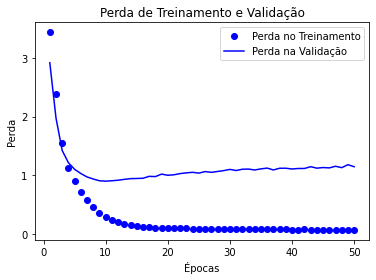

In [12]:
perda = historico.history['loss']
valor_perda = historico.history['val_loss']

epoca = range(1 , len(perda) + 1)

plt.plot(epoca , perda , 'bo' , label = 'Perda no Treinamento' )
plt.plot(epoca , valor_perda, 'b' , label = 'Perda na Validação')
plt.title('Perda de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')

plt.legend()
plt.rc('font', size = 15)
plt.rc('figure', figsize=[10,10])
plt.show()

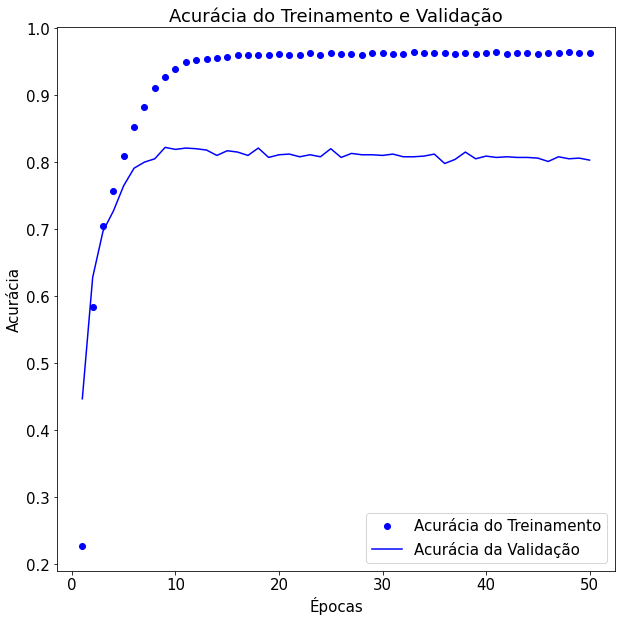

In [13]:
acuracia = historico.history['accuracy']
valor_acuracia = historico.history['val_accuracy']

epoca = range(1 , len(acuracia) + 1)

plt.plot(epoca , acuracia , 'bo' , label = 'Acurácia do Treinamento' )
plt.plot(epoca , valor_acuracia, 'b' , label = 'Acurácia da Validação')
plt.title('Acurácia do Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

plt.legend()
plt.rc('font', size = 15)
plt.rc('figure', figsize=[10,10])
plt.show()

<h3> Avaliação do modelo aplicando dados de teste </h3>

In [14]:
print(rede.evaluate(x_teste, one_hot_classes_teste))

71/71 [==============================] - 0s 2ms/step - loss: 1.3309 - accuracy: 0.7823
[1.3309470415115356, 0.7822796106338501]


<h3> Predição do modelo aplicando dados de teste </h3>

In [15]:
predicao = rede.predict(x_teste)
print(predicao[0].shape,'***', np.sum(predicao[0]),'***', np.argmax(predicao[0]))


(46,) *** 1.0000004 *** 3
